In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from scipy.stats import gaussian_kde, f_oneway
import matplotlib.pyplot as plt


In [2]:
data_dir = '/content/content/MyDrive/data'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'feature_details_analysis.xlsx',
 'data_description.txt',
 'feature_classification.csv',
 'train_refined.csv',
 'train_refined - Copy.csv',
 'feature_classification - Copy.csv']

In [3]:
data_path = 'train.csv'
data_desc = 'data_description.txt'

In [4]:
# Load the dataset
df_train = pd.read_csv(data_path)
df_train.shape

(1460, 81)

In [5]:
# Display the first few rows of the dataset
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df_train.dtypes.value_counts()

,count
object,43
int64,35
float64,3


In [9]:
df_train.dtypes.value_counts().sum()

np.int64(81)

In [10]:
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


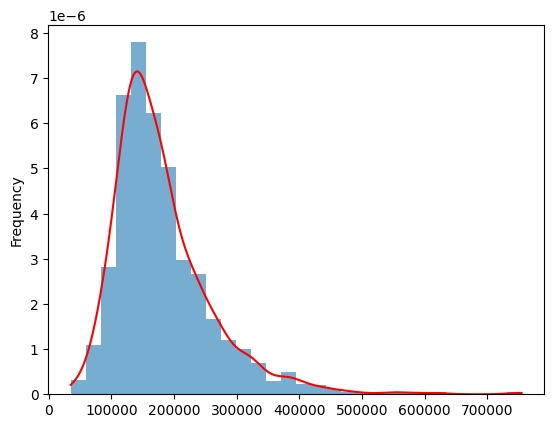

In [11]:
df_train['SalePrice'].plot(kind='hist', bins =30, density=True, alpha=0.6)
x_vals = np.linspace(df_train['SalePrice'].min(), df_train['SalePrice'].max(), 1000)
kde = gaussian_kde(df_train['SalePrice'])
plt.plot(x_vals, kde(x_vals), color='r')

# __Normal distribution, Data Skewness and kurtosis__
#### In data analysis, the __mean__ is a central reference point for understanding the data.
#### We examine data spread around the mean to assess consistency or variability in values.
#### __Density__ measures how data clusters near the mean, often forming symmetrical or asymmetrical shapes.
#### A __bell curve__ shows how values concentrate around the mean and taper symmetrically outward.
#### __Deviation__ from normal occurs when data leans (skewed) or forms peaks or flat shapes.
#### __Skewness__ indicates whether data tilts more toward lower or higher values relative to the mean.
#### __Kurtosis__ measures whether data has a sharp, narrow peak or flatter, extended tails.

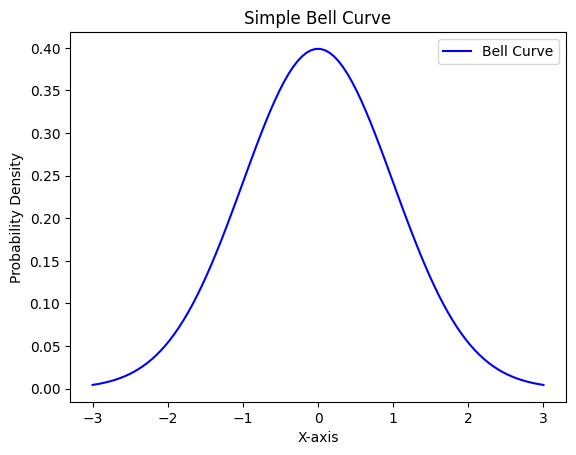

In [12]:
# Generate x values from -3 to 3
x_vals = np.linspace(-3, 3, 100)

# Compute the y values for a standard bell curve
y_vals = (1 / np.sqrt(2 * np.pi)) * np.exp(-0.5 * x_vals**2)

# Plot the simple bell curve
plt.plot(x_vals, y_vals, color='blue', label='Bell Curve')

# Add labels and title
plt.title('Simple Bell Curve')
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()


In [13]:
print('Sale Price Skewness: ',df_train['SalePrice'].skew())
print('Sale Price Kurtosis: ',df_train['SalePrice'].kurt())

Sale Price Skewness:  1.8828757597682129
Sale Price Kurtosis:  6.536281860064529


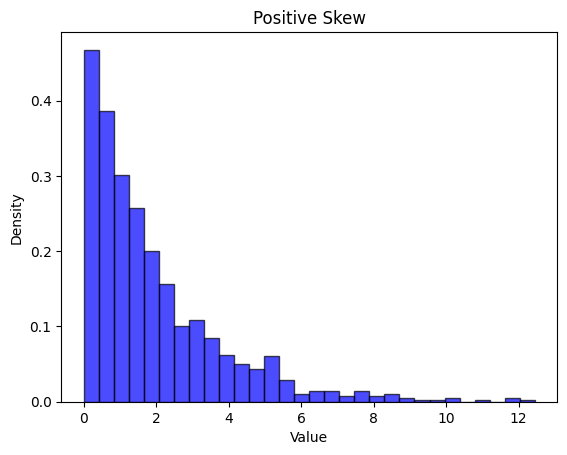

In [14]:
# Generate positively skewed data using exponential distribution
positive_skew = np.random.exponential(scale=2, size=1000)

# Plot the positive skew data
plt.hist(positive_skew, bins=30, color='blue', alpha=0.7, edgecolor='black', density=True)
plt.title('Positive Skew')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


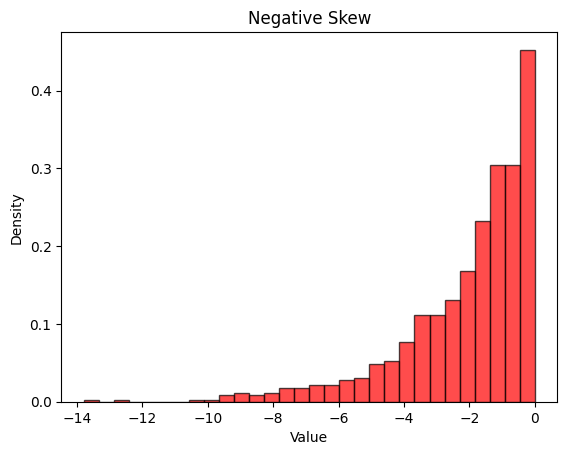

In [15]:
# Generate negatively skewed data by flipping an exponential distribution
negative_skew = -np.random.exponential(scale=2, size=1000)

# Plot the negative skew data
plt.hist(negative_skew, bins=30, color='red', alpha=0.7, edgecolor='black', density=True)
plt.title('Negative Skew')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


# __Data outliers__
#### __Outliers__ are data points that significantly deviate from the majority of the dataset's values.
#### They can arise due to natural variability, data collection errors, or unique extreme cases.
#### Outliers often impact statistical metrics like the mean, standard deviation, and data distribution.
#### __Boxplots__ visually highlight outliers as points beyond __whiskers__, which represent normal data range.
#### __Quartiles__ divide data into four equal parts, with __IQR__ measuring the middle 50% range.
#### Values beyond __Q1-1.5XIQR or  Q3+1.5XIQR__ are __outliers__.
#### __Scatter plots__ complement __boxplots__ by showing __outliers__ deviating from the __main data cluster.__

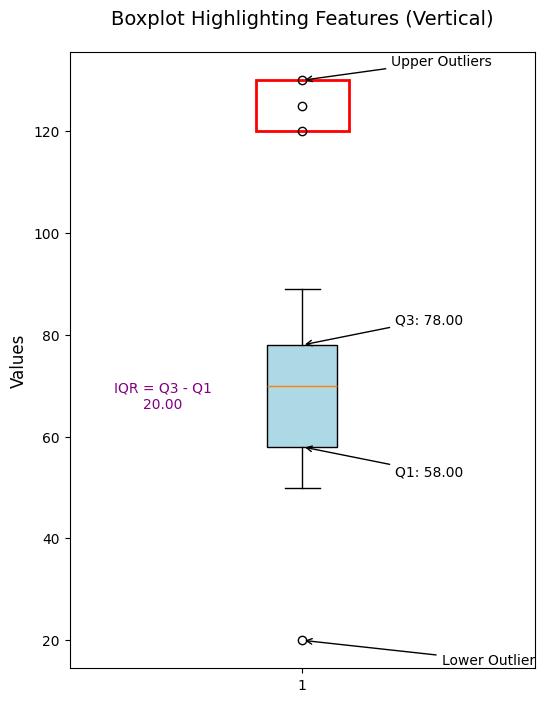

In [16]:
# Generate sample data with outliers
np.random.seed(42)  # For reproducibility
data = np.random.randint(50, 90, 100)  # Random integers between 50 and 89
outliers = [20, 120, 125, 130]  # Extreme values
data_with_outliers = np.append(data, outliers)

# Calculate Quartiles, IQR, and Whiskers
Q1 = np.percentile(data_with_outliers, 25)  # First quartile (25th percentile)
Q3 = np.percentile(data_with_outliers, 75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                               # Interquartile Range

lower_whisker = Q1 - 1.5 * IQR
upper_whisker = Q3 + 1.5 * IQR
# Create the vertical boxplot
plt.figure(figsize=(6, 8))
plt.boxplot(data_with_outliers, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'), whis=1.5)

# Add Title and Labels
plt.title("Boxplot Highlighting Features (Vertical)", fontsize=14, pad=20)
plt.ylabel("Values", fontsize=12)

# Annotate Quartiles
plt.annotate(f"Q1: {Q1:.2f}", xy=(1, Q1), xytext=(1.2, Q1 - 5),
             arrowprops=dict(facecolor="blue", arrowstyle="->"), fontsize=10, va="center")
plt.annotate(f"Q3: {Q3:.2f}", xy=(1, Q3), xytext=(1.2, Q3 + 5),
             arrowprops=dict(facecolor="blue", arrowstyle="->"), fontsize=10, va="center")

# Annotate IQR
plt.text(0.7, (Q1 + Q3) / 2, f"IQR = Q3 - Q1\n{IQR:.2f}", color="purple",
         fontsize=10, ha="center", va="center")

# Draw Rectangle to Highlight All Upper Outliers
upper_outliers = [point for point in data_with_outliers if point > upper_whisker]
if upper_outliers:
    # Define rectangle dimensions
    y_min = min(upper_outliers)  # Start of rectangle
    y_max = max(upper_outliers)  # End of rectangle
    x_min = 0.9  # Rectangle width on x-axis
    x_max = 1.1
    plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min,
                                      edgecolor="red", facecolor="none", linewidth=2))
    # Annotate as "Upper Outliers"
    plt.annotate("Upper Outliers", xy=(1, y_max), xytext=(1.3, y_max + 3),
                 arrowprops=dict(facecolor="red", arrowstyle="->"), fontsize=10, ha="center")

# Annotate Lower Outliers
lower_outliers = [point for point in data_with_outliers if point < lower_whisker]
if lower_outliers:
    min_outlier = min(lower_outliers)
    plt.annotate("Lower Outlier", xy=(1, min_outlier), xytext=(1.3, min_outlier - 4),
                 arrowprops=dict(facecolor="red", arrowstyle="->"), fontsize=10, va="center")

# Show the plot
plt.show()


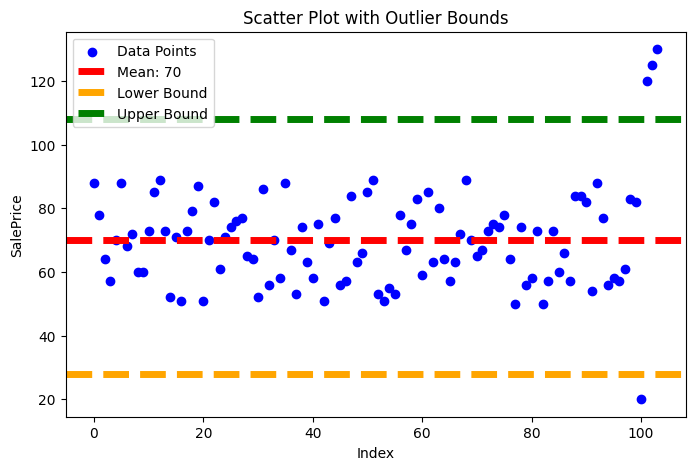

In [17]:
# Step 4: Investigate Outliers

plt.figure(figsize=(8, 5))
plt.scatter(range(len(data_with_outliers)), data_with_outliers, color='blue', label='Data Points')

# Calculate and draw the mean line
mean_value = np.mean(data_with_outliers)  # Calculate the mean
plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=5, label=f'Mean: {mean_value:.0f}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
plt.axhline(y=lower_bound, color='orange', linestyle='--', linewidth=5, label='Lower Bound')
plt.axhline(y=upper_bound, color='green', linestyle='--', linewidth=5, label='Upper Bound')
plt.title('Scatter Plot with Outlier Bounds')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


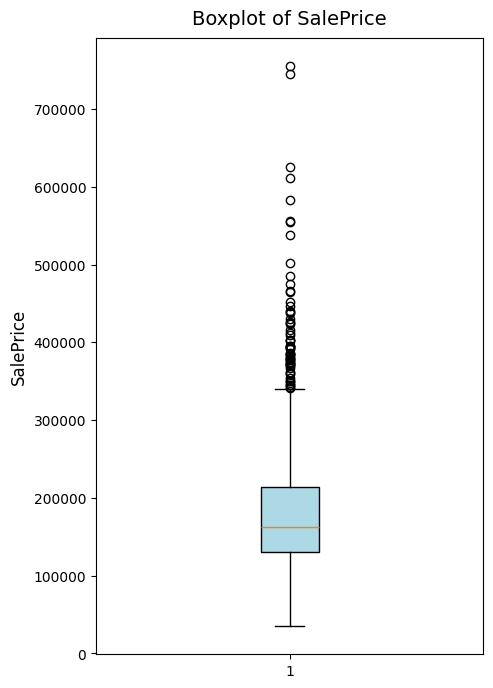

Q1 (25th percentile): 129975.0
Q3 (75th percentile): 214000.0
IQR (Interquartile Range): 84025.0
Number of outliers: 61
Outliers:
11      345000
53      385000
58      438780
112     383970
151     372402
         ...  
1268    381000
1353    410000
1373    466500
1388    377500
1437    394617
Name: SalePrice, Length: 61, dtype: int64


In [18]:
# Assuming SalePrice data is in a DataFrame called df_train
sale_price = df_train['SalePrice']

# Step 1: Visualize with a Vertical Boxplot
plt.figure(figsize=(5, 8))  # Adjusted for vertical orientation
plt.boxplot(sale_price, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot of SalePrice', fontsize=14, pad=10)
plt.ylabel('SalePrice', fontsize=12)
plt.show()

# Step 2: Calculate Quartiles and IQR
Q1 = sale_price.quantile(0.25)  # First quartile (25th percentile)
Q3 = sale_price.quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1                   # Interquartile range

print(f"Q1 (25th percentile): {Q1}")
print(f"Q3 (75th percentile): {Q3}")
print(f"IQR (Interquartile Range): {IQR}")

# Step 3: Identify Outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = sale_price[(sale_price < lower_bound) | (sale_price > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print("Outliers:")
print(outliers)


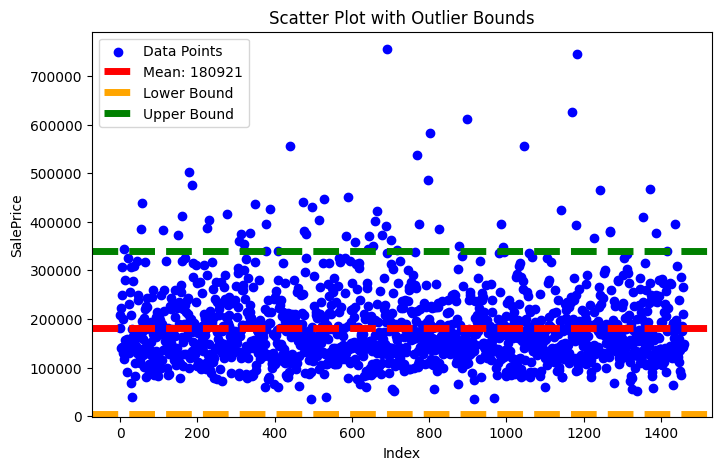

In [19]:
# Step 4: Investigate Outliers

plt.figure(figsize=(8, 5))
plt.scatter(range(len(sale_price)), sale_price, color='blue', label='Data Points')

# Calculate and draw the mean line
mean_value = np.mean(sale_price)  # Calculate the mean
plt.axhline(y=mean_value, color='red', linestyle='--', linewidth=5, label=f'Mean: {mean_value:.0f}')

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
plt.axhline(y=lower_bound, color='orange', linestyle='--', linewidth=5, label='Lower Bound')
plt.axhline(y=upper_bound, color='green', linestyle='--', linewidth=5, label='Upper Bound')
plt.title('Scatter Plot with Outlier Bounds')
plt.xlabel('Index')
plt.ylabel('SalePrice')
plt.legend()
plt.show()


# __Features of a dataset__
#### Features are the individual columns or fields in a dataset, each describing unique data properties.
#### They serve as input variables for analysis, shaping the outcome of data-driven models.
#### Features can be classified into __numeric, ordinal, nominal, and date/time__ categories for better understanding.
#### __Numeric features__, like sale price, can be __continuous or discrete__, represented by int or float.
#### __Ordinal features__ have a meaningful __order__, like quality ratings or education levels, numeric or non-numeric.
#### __Nominal features__ are __categories without a ranking__, such as house styles or neighborhoods.
#### __Date/Time Features__ are __temporal features__ capture __time-related__ aspects, like year built, and often need conversion to datetime64.
#### Accurate representation of features ensures effective preprocessing, analysis, and improved model performance.

In [20]:
# Numeric or Quantative features data types
df_train[['LotFrontage', 'LotArea']].dtypes

,0
LotFrontage,float64
LotArea,int64


In [21]:
# Numeric or Quantative features
df_train[['LotFrontage', 'LotArea']].head()

,LotFrontage,LotArea
0,65.0,8450
1,80.0,9600
2,68.0,11250
3,60.0,9550
4,84.0,14260


In [22]:
# Ordinal Features data types
df_train[['ExterQual', 'ExterCond', 'OverallQual']].dtypes

,0
ExterQual,object
ExterCond,object
OverallQual,int64


In [23]:
# Ordinal Features
df_train[['ExterQual', 'ExterCond', 'OverallQual']].head()

,ExterQual,ExterCond,OverallQual
0,Gd,TA,7
1,TA,TA,6
2,Gd,TA,7
3,TA,TA,7
4,Gd,TA,8


In [24]:
# Nominal Features data types
df_train[['BldgType', 'RoofStyle', 'RoofMatl']].dtypes

,0
BldgType,object
RoofStyle,object
RoofMatl,object


In [25]:
# Nominal Features
df_train[['BldgType', 'RoofStyle', 'RoofMatl']].head()

,BldgType,RoofStyle,RoofMatl
0,1Fam,Gable,CompShg
1,1Fam,Gable,CompShg
2,1Fam,Gable,CompShg
3,1Fam,Gable,CompShg
4,1Fam,Gable,CompShg


In [26]:
# Date & Time Features datatype
df_train[['YearBuilt', 'YearRemodAdd', 'YrSold']].dtypes

,0
YearBuilt,int64
YearRemodAdd,int64
YrSold,int64


In [27]:
# Date & Time Features
df_train[['YearBuilt', 'YearRemodAdd', 'YrSold']].head()

,YearBuilt,YearRemodAdd,YrSold
0,2003,2003,2008
1,1976,1976,2007
2,2001,2002,2008
3,1915,1970,2006
4,2000,2000,2008


# __Preparation to analyze Features__
#### The dataset contains __81__ columns, with __Id__ as a non-predictive column and __SalePrice__ as the target.
#### Each __column__ is called __feature__ excluding __Id and SalePrice__, we have __79 features__ for comprehensive feature analysis.
#### Features will be categorized into types like __numeric, ordinal, nominal, or date/time__ for preprocessing.
#### We  have created a new DataFrame to store feature information.
#### The __data_description.txt__ file provides detailed metadata for mapping into the created DataFrame.
#### __Hidden characters__ like newline or tab are removed using __rstrip()__ for cleaner outputs during processing.
#### A __helper function__ retrieves feature descriptions and details, making analysis efficient and organized.

In [28]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [29]:
# Feature classification dataframe
feature_cat = pd.DataFrame(df_train.dtypes)
feature_cat.rename(columns={0: 'datatype'}, inplace=True)
feature_cat.drop(index='Id', inplace=True)
feature_cat.drop(index='SalePrice',inplace=True)

feature_cat.head()

,datatype
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object


In [30]:
# Open Data Description file
with open(data_desc, 'r', encoding='utf-8') as meta_data:
    data_info = meta_data.readlines()

for line in data_info[:50]:
    print(line.rstrip())

MSSubClass: Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.

       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park
       RM	Res

In [31]:
# Getting featre description from data_description file into our data frame.
for feature in feature_cat.index:


    for line in data_info:
        line = line.rstrip()


        if line.split(':')[0].strip() == feature:
            feature_cat.loc[feature, 'Feature_desc'] = line.split(':')[1].strip()
feature_cat.head()

,datatype,Feature_desc
MSSubClass,int64,Identifies the type of dwelling involved in th...
MSZoning,object,Identifies the general zoning classification o...
LotFrontage,float64,Linear feet of street connected to property
LotArea,int64,Lot size in square feet
Street,object,Type of road access to property


In [32]:
def extract_feature_info(feature_name, file_lines):
    """
    Extracts the description and details of a specified feature from a list of file lines.

    Parameters:
        feature_name (str): The name of the feature to extract.
        file_lines (list): The lines of the file as a list of strings.

    Returns:
        tuple: A tuple containing the feature description (str) and details (str).
    """
    description = None
    details = []  # To collect lines with feature details
    is_feature_section = False

    for idx, line in enumerate(file_lines):
        line = line.rstrip()  # Remove trailing whitespace

        # Check if the line is the feature name
        if line.startswith(f"{feature_name}:"):
            # Extract the description for the feature
            description = line.split(":", 1)[1].strip()
            is_feature_section = True  # Start capturing details from subsequent lines
            continue

        # If capturing details, stop when encountering a new feature
        if is_feature_section:
            # A new feature starts if ":" is present AND the line does NOT start with a space
            if ":" in line and not line.startswith(" "):
                break

            # Otherwise, add non-empty lines to details
            if line.strip():  # Skip empty lines
                details.append(line.strip())

    # Combine details into a single string with proper formatting
    details_str = "\n".join(details)
    return feature_name, description, details_str


In [33]:
feature_name, feature_description, feature_details = extract_feature_info('PoolQC', data_info)
print(f'{feature_name} : {feature_description}')
print(feature_details)

PoolQC : Pool quality
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
NA	No Pool


# __Features analysis__
#### To handle display constraints, __iloc__ divides features into smaller subsets for effective inspection.
#### __MSSubClass__ represents dwelling types, classified as a __nominal__ feature in our DataFrame.
#### __LotFrontage and LotArea__ are __numeric__ features, while __MSZoning__ and road types are __nominal__.

In [34]:
df_train.iloc[:,72:].head()

,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [35]:
#nominal, numeric, ordinal, datetime
feature_cat.loc['MiscVal', 'Feature_type'] = 'numeric'

# __Features analysis Null value management__
#### __Feature classification__ has been completed and saved to safeguard against any potential data loss.
#### Dataset includes 40 nominal, 20 numeric, 16 ordinal, and 5 datetime features.
#### Missing Feature_type values were isolated using Pandas filtering to address gaps in classification.
#### Six features with the most missing data, including PoolQC and MiscFeature, were removed.
##### Remaining features with missing values will be handled later based on their broader dataset context.

In [36]:
feature_cat = pd.read_csv('feature_classification.csv', index_col=0)
feature_cat.head()

,datatype,Feature_desc,Feature_type
MSSubClass,int64,Identifies the type of dwelling involved in th...,nominal
MSZoning,object,Identifies the general zoning classification o...,nominal
LotFrontage,float64,Linear feet of street connected to property,numeric
LotArea,int64,Lot size in square feet,numeric
Street,object,Type of road access to property,nominal


In [37]:
feature_cat[feature_cat['Feature_type'].isnull()]

,datatype,Feature_desc,Feature_type


In [38]:
feature_cat['Feature_type'].value_counts()

,count
Feature_type,
nominal,37
numeric,21
ordinal,16
datetime,5


In [39]:
df_train.isnull().sum()[df_train.isnull().sum() >0].count()

np.int64(19)

In [40]:
df_train.isnull().sum()[df_train.isnull().sum() >0].sort_values(ascending=False)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [41]:
df_train.drop(columns='PoolQC',inplace=True)

In [42]:
feature_name, feature_description, feature_details = extract_feature_info('MiscFeature', data_info)
print(f'{feature_name} : {feature_description}')
print(feature_details)

MiscFeature : Miscellaneous feature not covered in other categories
Elev	Elevator
Gar2	2nd Garage (if not described in garage section)
Othr	Other
Shed	Shed (over 100 SF)
TenC	Tennis Court
NA	None


In [43]:
df_train[df_train['MiscFeature'].notnull()]['SalePrice'].describe()

,SalePrice
count,54.000000
mean,151623.944444
std,52996.542694
min,55000.000000
25%,120125.000000
50%,146000.000000
75%,181750.000000
max,277000.000000


In [44]:
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [45]:
df_train.drop(columns='MiscFeature',inplace=True)

In [46]:
feature_name, feature_description, feature_details = extract_feature_info('Alley', data_info)
print(f'{feature_name} : {feature_description}')
print(feature_details)

Alley : Type of alley access to property
Grvl	Gravel
Pave	Paved
NA 	No alley access


In [47]:
df_train[df_train['Alley'].notnull()]['SalePrice'].describe()

,SalePrice
count,91.000000
mean,142845.912088
std,42867.137343
min,40000.000000
25%,114752.000000
50%,140000.000000
75%,172200.000000
max,265979.000000


In [48]:
df_train['SalePrice'].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [49]:
df_train.drop(columns='Alley',inplace=True)

In [50]:
df_train.drop(columns=['Fence','MasVnrType', 'FireplaceQu'] ,inplace=True)

# __Features correlation__
#### __Correlation quantifies__ the relationship between variables, measuring the strength and direction of the association.
#### __Positive correlation__ means both variables increase together, e.g., height and weight typically increase simultaneously.
#### __Negative correlation__ indicates one variable rises while the other falls, e.g., speed and travel time.
#### No correlation suggests one variable's changes do not affect the other, like shoe size and intelligence.
#### The correlation coefficient ranges between __-1 (perfect negative) and 1 (perfect positive)__.
#### __Heatmaps__ visualize correlation matrices using color gradients, making patterns and relationships easily identifiable.
#### Features like GrLivArea, GarageArea, and TotalBsmtSF strongly correlate with SalePrice, guiding predictions.

In [51]:
numeric_features = df_train.loc[:,feature_cat[feature_cat['Feature_type'] == 'numeric'].index]

In [52]:
numeric_features['SalePrice'] = df_train['SalePrice']

In [53]:
numeric_features.shape

(1460, 22)

In [54]:
numeric_feature_corr_matrix = numeric_features.corr()

In [55]:
numeric_feature_corr_matrix

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,...,-0.006069,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.351799
LotArea,0.426095,1.000000,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,...,-0.017784,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,...,-0.037610,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,0.477493
BsmtFinSF1,0.233633,0.214103,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,...,-0.081007,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,0.386420
BsmtFinSF2,0.049900,0.111170,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,...,-0.040751,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.028167,...,0.030086,0.183303,-0.005316,0.129005,-0.002538,0.020764,-0.012579,-0.035092,-0.023837,0.214479
TotalBsmtSF,0.392075,0.260833,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,-0.033245,...,-0.068901,0.486665,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,-0.014241,...,0.068101,0.489782,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.063353,...,0.059306,0.138347,0.092165,0.208026,0.061989,-0.024358,0.040606,0.081487,0.016197,0.319334
LowQualFinSF,0.038469,0.004779,-0.069071,-0.064503,0.014807,0.028167,-0.033245,-0.014241,0.063353,1.000000,...,0.007522,-0.067601,-0.025444,0.018251,0.061081,-0.004296,0.026799,0.062157,-0.003793,-0.025606


Text(0.5, 1.0, 'Numeric Feature Correlation Heatmap with SalePrice')

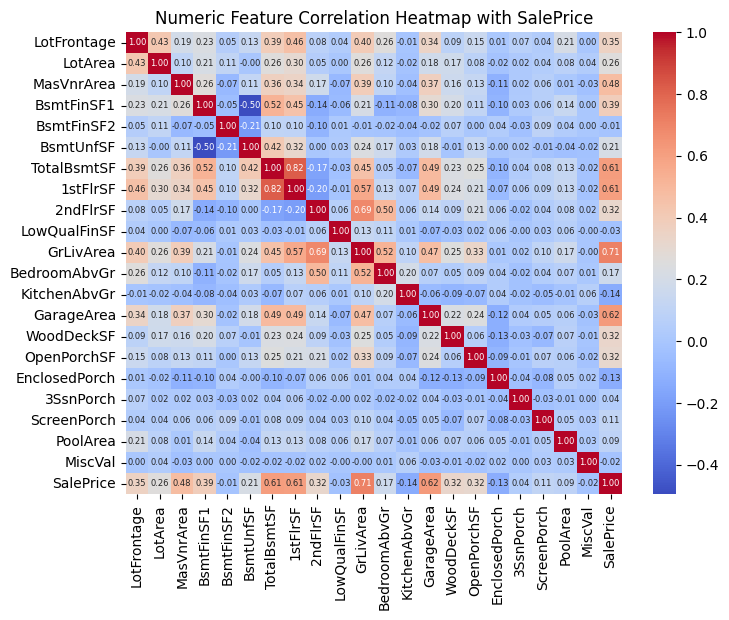

In [56]:
plt.figure(figsize=(8,6))
sns.heatmap(numeric_feature_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 6})
plt.title('Numeric Feature Correlation Heatmap with SalePrice')

<Axes: >

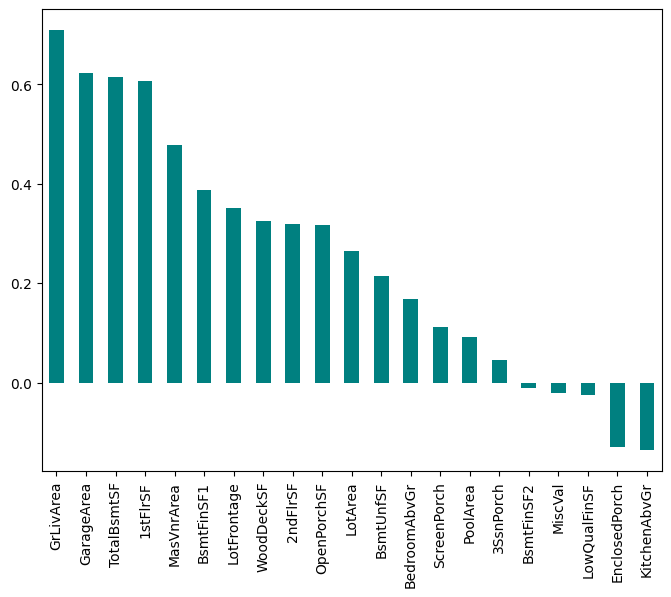

In [57]:
numeric_sale_price_correlation = numeric_feature_corr_matrix['SalePrice'].sort_values(ascending=False)
numeric_sale_price_correlation.drop('SalePrice').plot(kind='bar', figsize=(8,6), color='teal')

In [58]:
df_train.drop(columns=['BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], inplace=True)
df_train.shape

(1460, 68)

# __Numeric features Missing value handling__
#### We will address missing values in LotFrontage (259) and MasVnrArea (8) step by step.
#### For LotFrontage, we will use the median, ensuring consistency while handling outliers effectively.
#### The same imputation method will be applied to MasVnrArea, resolving all numeric missing values.
#### Post-imputation, we will validate correlations, confirming no impact before analyzing date-time features.

In [59]:
# Get the list of numeric features from feature_cat
numeric_features = feature_cat[feature_cat['Feature_type'] == 'numeric'].index

# Find the numeric features that are still in df_train
remaining_numeric_features = [feature for feature in numeric_features if feature in df_train.columns]

# Display the remaining numeric features
print(len(remaining_numeric_features))
df_train[remaining_numeric_features].isnull().sum()[df_train.isnull().sum()>0]

14


,0
LotFrontage,259
MasVnrArea,8


In [60]:
df_train['LotFrontage'].head(50)

,LotFrontage
0,65.0
1,80.0
2,68.0
3,60.0
4,84.0
5,85.0
6,75.0
7,NaN
8,51.0
9,50.0


In [61]:
df_train.loc[:, 'LotFrontage'] = df_train['LotFrontage'].fillna(df_train['LotFrontage'].median())

In [62]:
df_train['MasVnrArea'].head(50)

,MasVnrArea
0,196.0
1,0.0
2,162.0
3,0.0
4,350.0
5,0.0
6,186.0
7,240.0
8,0.0
9,0.0


In [63]:
df_train.loc[:, 'MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].median())

In [64]:
df_train[remaining_numeric_features].isnull().sum()[df_train.isnull().sum()>0]

,0


In [65]:
df_train[remaining_numeric_features].corr()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,GarageArea,WoodDeckSF,OpenPorchSF
LotFrontage,1.000000,0.304522,0.178469,0.214367,0.124098,0.363472,0.413773,0.072388,0.368007,0.236840,-0.004905,0.323511,0.075542,0.137014
LotArea,0.304522,1.000000,0.103321,0.214103,-0.002618,0.260833,0.299475,0.050986,0.263116,0.119690,-0.017784,0.180403,0.171698,0.084774
MasVnrArea,0.178469,0.103321,1.000000,0.261256,0.113862,0.360067,0.339850,0.173800,0.388052,0.102775,-0.038450,0.370884,0.159991,0.122528
BsmtFinSF1,0.214367,0.214103,0.261256,1.000000,-0.495251,0.522396,0.445863,-0.137079,0.208171,-0.107355,-0.081007,0.296970,0.204306,0.111761
BsmtUnfSF,0.124098,-0.002618,0.113862,-0.495251,1.000000,0.415360,0.317987,0.004469,0.240257,0.166643,0.030086,0.183303,-0.005316,0.129005
TotalBsmtSF,0.363472,0.260833,0.360067,0.522396,0.415360,1.000000,0.819530,-0.174512,0.454868,0.050450,-0.068901,0.486665,0.232019,0.247264
1stFlrSF,0.413773,0.299475,0.339850,0.445863,0.317987,0.819530,1.000000,-0.202646,0.566024,0.127401,0.068101,0.489782,0.235459,0.211671
2ndFlrSF,0.072388,0.050986,0.173800,-0.137079,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.502901,0.059306,0.138347,0.092165,0.208026
GrLivArea,0.368007,0.263116,0.388052,0.208171,0.240257,0.454868,0.566024,0.687501,1.000000,0.521270,0.100063,0.468997,0.247433,0.330224
BedroomAbvGr,0.236840,0.119690,0.102775,-0.107355,0.166643,0.050450,0.127401,0.502901,0.521270,1.000000,0.198597,0.065253,0.046854,0.093810


Text(0.5, 1.0, 'Numeric Feature Correlation Heatmap with SalePrice')

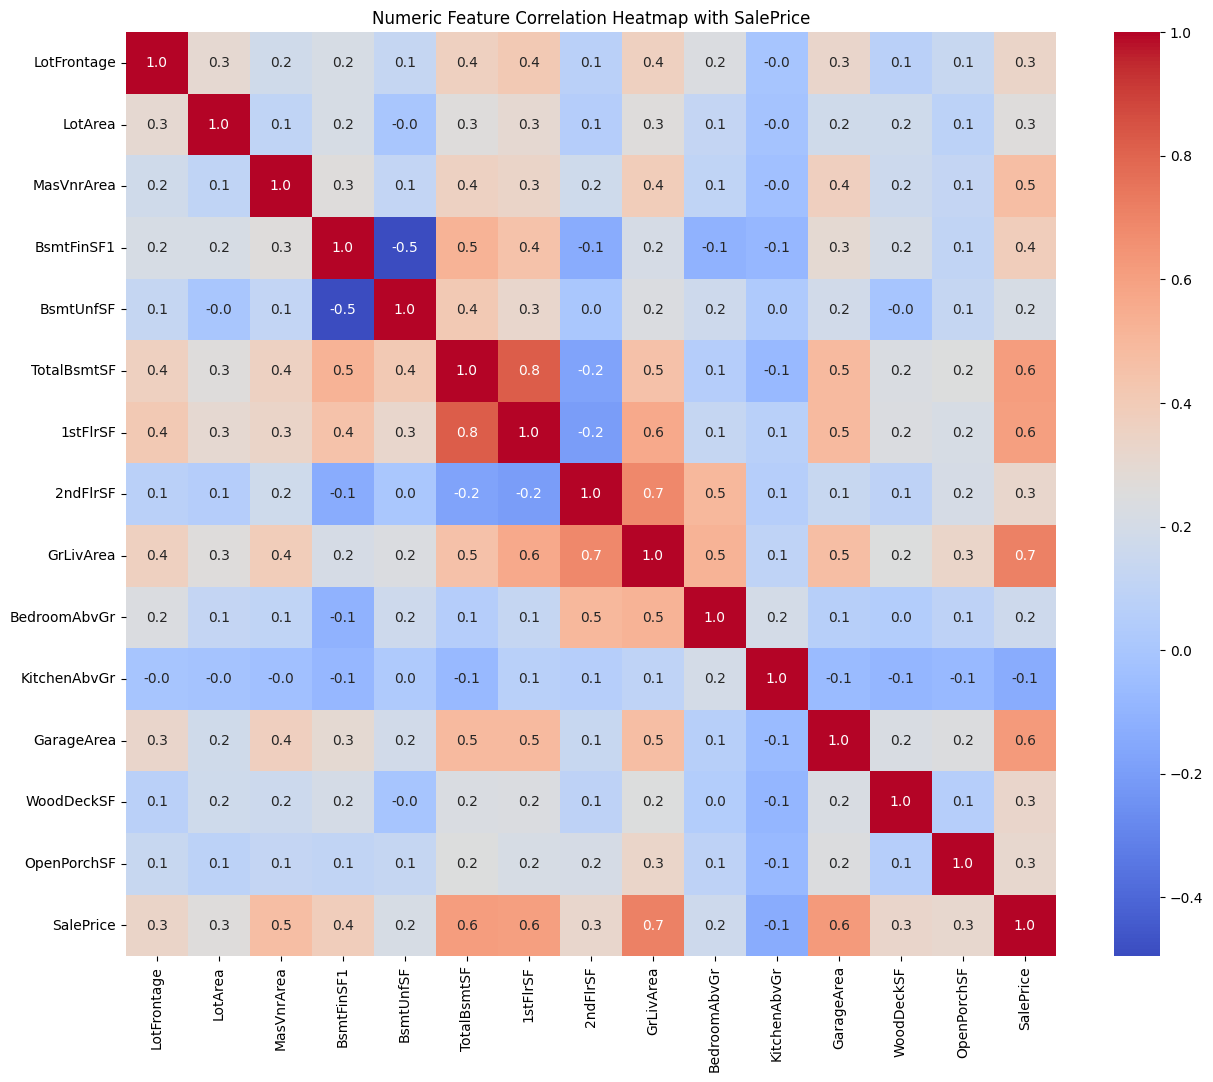

In [66]:
numeric_feature_corr_matrix2 = df_train[remaining_numeric_features + ['SalePrice']].corr()
plt.figure(figsize=(15,12))
sns.heatmap(numeric_feature_corr_matrix2, annot=True, cmap='coolwarm', fmt='.1f', annot_kws={"size": 10})
plt.title('Numeric Feature Correlation Heatmap with SalePrice')

<Axes: >

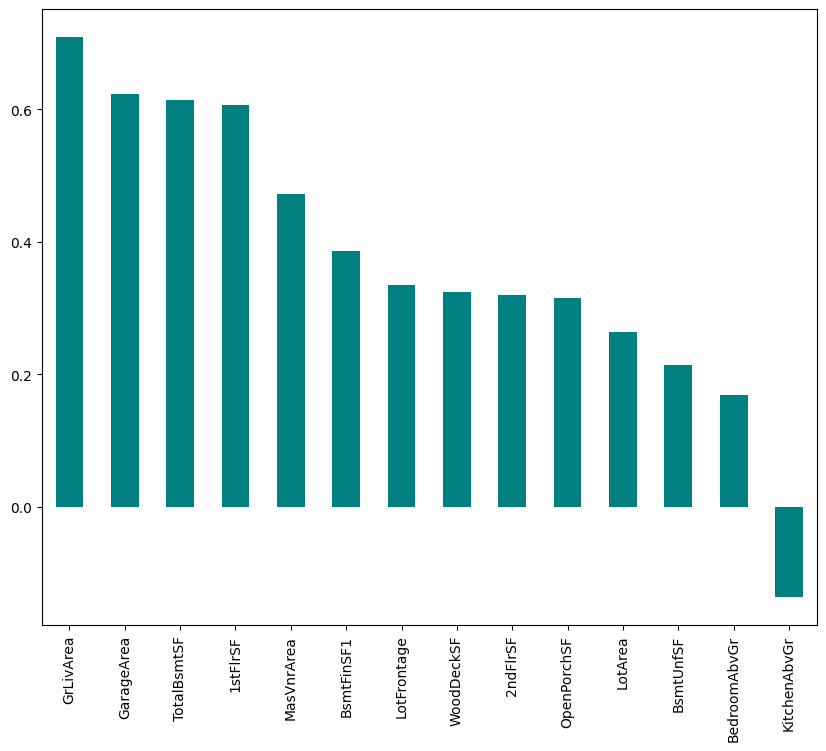

In [67]:
numeric_sale_price_correlation = numeric_feature_corr_matrix2['SalePrice'].sort_values(ascending=False)
numeric_sale_price_correlation.drop('SalePrice').plot(kind='bar', figsize=(10,8), color='teal')

# __The Limitations of EDA When Intuition and Data Disagree__
#### Exploratory Data Analysis (EDA) helps uncover patterns but requires domain knowledge for accurate interpretation.
#### Correlations can fail to reflect true relationships, especially in cases of non-linear or complex data.
#### Missing data or incomplete representations often distort findings, leading to misleading conclusions.
#### Feature errors like misclassification highlight the importance of verifying data during the EDA process.
#### Broader knowledge identified distorted correlations due to economic factors like the 2007-2008 financial crisis.
#### EDA, combined with domain insights, ensures more holistic and accurate data-driven decision-making.

In [68]:
feature_cat.iloc[50:]

,datatype,Feature_desc,Feature_type
BedroomAbvGr,int64,Bedrooms above grade (does NOT include basemen...,numeric
KitchenAbvGr,int64,Kitchens above grade,numeric
KitchenQual,object,Kitchen quality,ordinal
TotRmsAbvGrd,int64,Total rooms above grade (does not include bath...,nominal
Functional,object,Home functionality (Assume typical unless dedu...,nominal
Fireplaces,int64,Number of fireplaces,nominal
FireplaceQu,object,Fireplace quality,ordinal
GarageType,object,Garage location,nominal
GarageYrBlt,float64,Year garage was built,datetime
GarageFinish,object,Interior finish of the garage,nominal


In [69]:
extract_feature_info('BedroomAbvGr', data_info)

('BedroomAbvGr',
 'Bedrooms above grade (does NOT include basement bedrooms)',
 '')

In [70]:
extract_feature_info('KitchenAbvGr', data_info)

('KitchenAbvGr', 'Kitchens above grade', '')

In [71]:
# Open Data Description file
with open(data_desc, 'r', encoding='utf-8') as meta_data:
    data_info = meta_data.readlines()

In [72]:
extract_feature_info('BedroomAbvGr', data_info)

('BedroomAbvGr',
 'Bedrooms above grade (does NOT include basement bedrooms)',
 '')

In [73]:
extract_feature_info('KitchenAbvGr', data_info)

('KitchenAbvGr', 'Kitchens above grade', '')

In [74]:
df_train[['BedroomAbvGr', 'KitchenAbvGr']].dtypes

,0
BedroomAbvGr,int64
KitchenAbvGr,int64


In [75]:
feature_cat.loc[['BedroomAbvGr', 'KitchenAbvGr']]

,datatype,Feature_desc,Feature_type
BedroomAbvGr,int64,Bedrooms above grade (does NOT include basemen...,numeric
KitchenAbvGr,int64,Kitchens above grade,numeric


In [76]:
feature_cat.loc['BedroomAbvGr', 'Feature_desc'] = 'Bedrooms above grade (does NOT include basement bedrooms)'
feature_cat.loc['BedroomAbvGr', 'Feature_type'] = 'numeric'
feature_cat.loc['KitchenAbvGr', 'Feature_desc'] = 'Kitchens above grade'
feature_cat.loc['KitchenAbvGr', 'Feature_type'] = 'numeric'


In [77]:
# feature_cat.to_csv('feature_classification.csv')

In [78]:
feature_cat.iloc[50:]

,datatype,Feature_desc,Feature_type
BedroomAbvGr,int64,Bedrooms above grade (does NOT include basemen...,numeric
KitchenAbvGr,int64,Kitchens above grade,numeric
KitchenQual,object,Kitchen quality,ordinal
TotRmsAbvGrd,int64,Total rooms above grade (does not include bath...,nominal
Functional,object,Home functionality (Assume typical unless dedu...,nominal
Fireplaces,int64,Number of fireplaces,nominal
FireplaceQu,object,Fireplace quality,ordinal
GarageType,object,Garage location,nominal
GarageYrBlt,float64,Year garage was built,datetime
GarageFinish,object,Interior finish of the garage,nominal


In [79]:
df_train[['BedroomAbvGr', 'KitchenAbvGr', 'SalePrice']].corr()

,BedroomAbvGr,KitchenAbvGr,SalePrice
BedroomAbvGr,1.000000,0.198597,0.168213
KitchenAbvGr,0.198597,1.000000,-0.135907
SalePrice,0.168213,-0.135907,1.000000


In [80]:
df_train['YrSold'].describe()

,YrSold
count,1460.000000
mean,2007.815753
std,1.328095
min,2006.000000
25%,2007.000000
50%,2008.000000
75%,2009.000000
max,2010.000000


# __Analyzing Datetime features__
#### Although converting to datetime is ideal, we’ll skip it due to the current split format.
#### __MoSold and YrSold__ have minimal impact and will be dropped, reducing dataset noise.

In [81]:
feature_cat['Feature_type'][feature_cat['Feature_type']=='datetime']

,Feature_type
YearBuilt,datetime
YearRemodAdd,datetime
GarageYrBlt,datetime
MoSold,datetime
YrSold,datetime


In [82]:
datetime_features = feature_cat['Feature_type'][feature_cat['Feature_type']=='datetime'].index
df_train[datetime_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008


In [83]:
feature_name, feature_description, feature_details = extract_feature_info('YearRemodAdd', data_info)
print(f'{feature_name} : {feature_description}')
print(feature_details)

YearRemodAdd : Remodel date (same as construction date if no remodeling or additions)



In [84]:
df_train[datetime_features].dtypes

,0
YearBuilt,int64
YearRemodAdd,int64
GarageYrBlt,float64
MoSold,int64
YrSold,int64


Text(0.5, 1.0, 'DateTime Feature Correlation Heatmap with SalePrice')

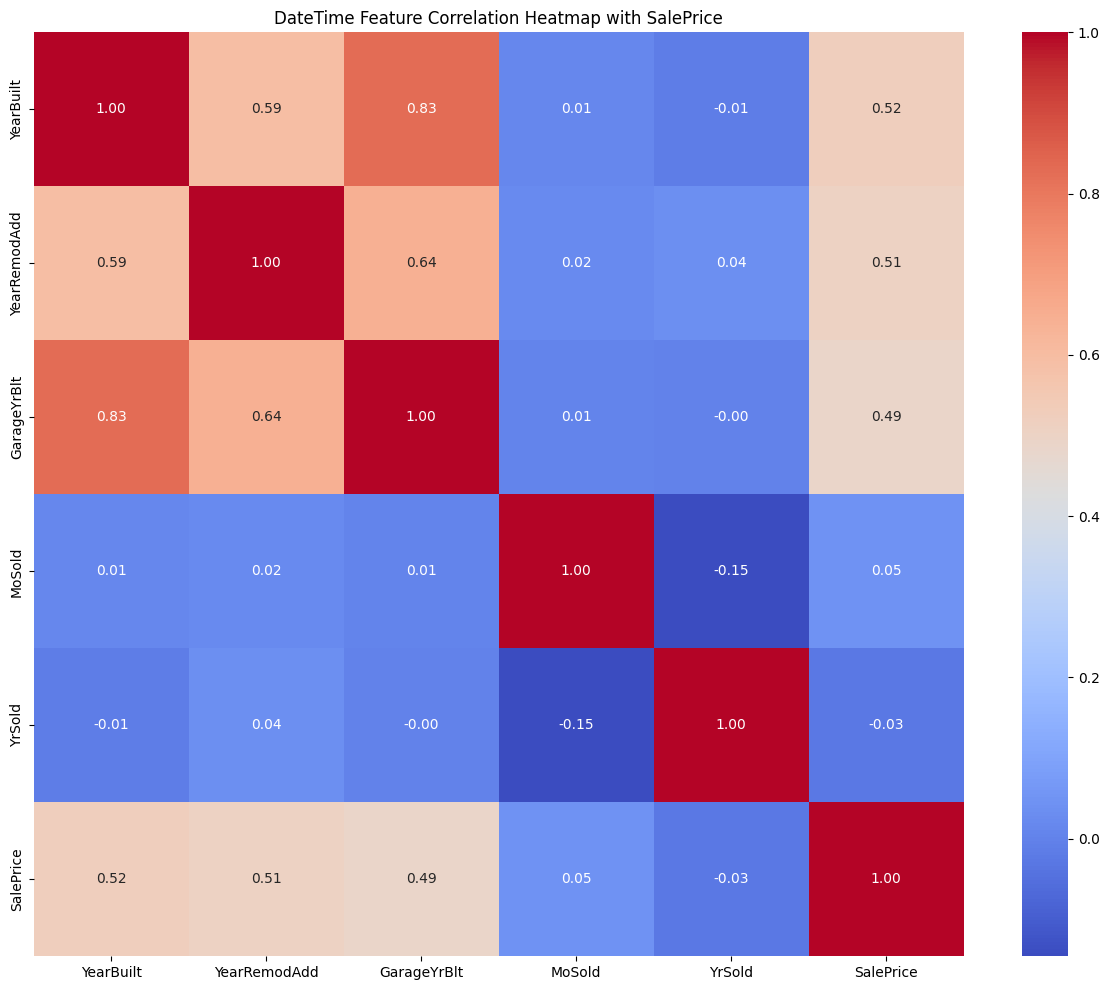

In [85]:
datetime_corr_matrix = df_train[list(datetime_features)+['SalePrice']].corr()
plt.figure(figsize=(15,12))
sns.heatmap(datetime_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('DateTime Feature Correlation Heatmap with SalePrice')

<Axes: >

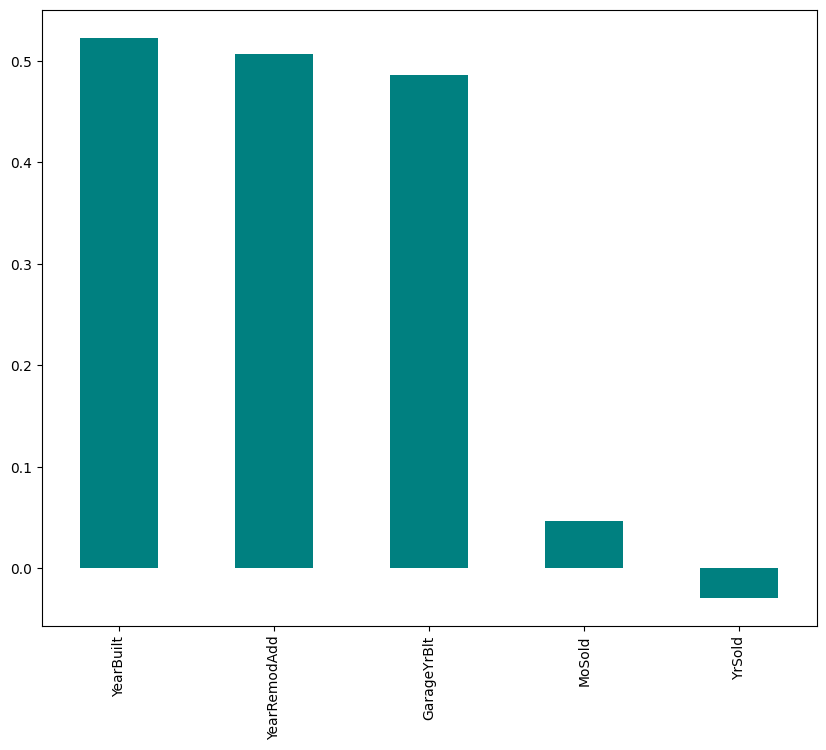

In [86]:
datetime_saleprice_corr = datetime_corr_matrix['SalePrice'].sort_values(ascending=False)
datetime_saleprice_corr.drop('SalePrice').plot(kind='bar', figsize=(10,8), color='teal')

In [87]:
df_train.drop(columns=['MoSold', 'YrSold'], inplace=True)

In [88]:
df_train.shape

(1460, 66)

# __Ordinal features analysis__
#### Converted features into __numeric values__ by mapping their hierarchy using helper functions.
#### Handled distinct value types with separate dictionaries and mapped them to the dataset effectively.
#### Calculated __Spearman correlation__ for ordinal features to identify those strongly impacting SalePrice.
#### Reduced features to 58 by dropping those with a correlation value below 0.35 for optimization.

In [89]:
feature_cat['Feature_type'].value_counts()

,count
Feature_type,
nominal,37
numeric,21
ordinal,16
datetime,5


In [90]:
ordinal_features = list(feature_cat[feature_cat['Feature_type']=='ordinal'].index)
ordinal_features

['OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [91]:
ordinal_features.remove('FireplaceQu')
ordinal_features.remove('PoolQC')
ordinal_features.remove('Fence')
ordinal_features

['OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'GarageCond']

In [92]:
df_train[ordinal_features].head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageQual,GarageCond
0,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Gd,TA,TA
1,6,8,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,TA,TA,TA
2,7,5,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Gd,TA,TA
3,7,5,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Gd,TA,TA
4,8,5,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Gd,TA,TA


In [93]:
ordinal_feature_quality = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'HeatingQC', 'KitchenQual',  'GarageQual', 'GarageCond']
ordinal_feature_quality

['ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'HeatingQC',
 'KitchenQual',
 'GarageQual',
 'GarageCond']

In [94]:
# Step 1: Build original and unique lists (preserves order)
original_list = []
for feature in ordinal_feature_quality:
    feature_name, feature_description, feature_details = extract_feature_info(feature, data_info)
    for detail in feature_details.splitlines():  # Split by newline first
        original_list.append(detail.split("\t")[0])  # Extract the abbreviation

# Step 2: Remove duplicates while preserving the order
qual_unique_list = []
for item in original_list:
    if item not in qual_unique_list:
        qual_unique_list.append(item)

# Step 3: Assign values (0 for NA, 5 for Ex, etc.)
qual_feature_mapping = {key: value for value, key in enumerate(reversed(qual_unique_list))}

# Print the mapping
print("Unique List:", qual_unique_list)
print("Value Mapping:", qual_feature_mapping)

Unique List: ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA']
Value Mapping: {'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5}


In [95]:
for feature in ordinal_feature_quality:
    df_train.loc[:,feature] = df_train[feature].map(qual_feature_mapping)
df_train[ordinal_feature_quality].head()

,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,GarageQual,GarageCond
0,4,3,4.0,3.0,5,4,3.0,3.0
1,3,3,4.0,3.0,5,3,3.0,3.0
2,4,3,4.0,3.0,5,4,3.0,3.0
3,3,3,3.0,4.0,4,4,3.0,3.0
4,4,3,4.0,3.0,5,4,3.0,3.0


In [96]:
remaining_ord_features = ['BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
for feature in remaining_ord_features:
    feature_name, feature_description, feature_details = extract_feature_info(feature, data_info)
    print(f'{feature_name} : {feature_description}')
    print(feature_details)

BsmtExposure : Refers to walkout or garden level walls
Gd	Good Exposure
Av	Average Exposure (split levels or foyers typically score average or above)
Mn	Mimimum Exposure
No	No Exposure
NA	No Basement
BsmtFinType1 : Rating of basement finished area
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement
BsmtFinType2 : Rating of basement finished area (if multiple types)
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement


In [97]:
dic1 = {'Gd': 4, 'Av':3, 'Mn':2, 'No': 1, 'NA':0}
dic2 = {'GLQ': 6, 'ALQ':5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf':1, 'NA':0}

In [98]:
df_train.loc[:, 'BsmtExposure'] = df_train['BsmtExposure'].map(dic1)
df_train.loc[:,'BsmtFinType1'] = df_train['BsmtFinType1'].map(dic2)
df_train.loc[:,'BsmtFinType2'] = df_train['BsmtFinType2'].map(dic2)

In [99]:
df_train[ordinal_features].head()

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageQual,GarageCond
0,7,5,4,3,4.0,3.0,1.0,6.0,1.0,5,4,3.0,3.0
1,6,8,3,3,4.0,3.0,4.0,5.0,1.0,5,3,3.0,3.0
2,7,5,4,3,4.0,3.0,2.0,6.0,1.0,5,4,3.0,3.0
3,7,5,3,3,3.0,4.0,1.0,5.0,1.0,4,4,3.0,3.0
4,8,5,4,3,4.0,3.0,3.0,6.0,1.0,5,4,3.0,3.0


In [100]:
df_train[ordinal_features].isnull().sum()

,0
OverallQual,0
OverallCond,0
ExterQual,0
ExterCond,0
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
HeatingQC,0


In [101]:
# Iterate over each feature in ordinal_feature_quality
for feature in ordinal_features:
    if df_train[feature].isnull().sum() > 0:  # Check if there are missing values
        median_value = df_train[feature].median()  # Calculate the median
        df_train.loc[:,feature].fillna(median_value, inplace=True)  # Fill missing values with the median

# Check if missing values are filled
print(df_train[ordinal_features].isnull().sum())

OverallQual     0
OverallCond     0
ExterQual       0
ExterCond       0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
HeatingQC       0
KitchenQual     0
GarageQual      0
GarageCond      0
dtype: int64


<ipython-input-101-0142f57e9f83>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train.loc[:,feature].fillna(median_value, inplace=True)  # Fill missing values with the median
<ipython-input-101-0142f57e9f83>:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train.loc[:,feature].fillna(median_value, inpla

In [102]:
df_train[ordinal_features+['SalePrice']].corr(method='spearman')

,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,KitchenQual,GarageQual,GarageCond,SalePrice
OverallQual,1.000000,-0.177521,0.715988,-0.015870,0.614378,0.157591,0.249614,0.215981,-0.121733,0.473591,0.660498,0.133076,0.125529,0.809829
OverallCond,-0.177521,1.000000,-0.228402,0.329091,-0.346700,0.065935,-0.074146,-0.077713,0.108949,-0.076913,-0.089707,0.003460,0.012672,-0.129325
ExterQual,0.715988,-0.228402,1.000000,-0.007822,0.620354,0.153009,0.229603,0.238837,-0.133218,0.552073,0.725266,0.100991,0.089910,0.684014
ExterCond,-0.015870,0.329091,-0.007822,1.000000,-0.103800,0.146866,-0.000644,0.034775,0.059591,0.044591,0.046113,0.046082,0.099585,0.011682
BsmtQual,0.614378,-0.346700,0.620354,-0.103800,1.000000,0.196329,0.299826,0.316077,-0.138229,0.419705,0.545085,0.133073,0.139396,0.619312
BsmtCond,0.157591,0.065935,0.153009,0.146866,0.196329,1.000000,0.092442,0.135413,0.088940,0.123219,0.141821,0.074534,0.110323,0.194589
BsmtExposure,0.249614,-0.074146,0.229603,-0.000644,0.299826,0.092442,1.000000,0.310151,0.053267,0.143689,0.238526,0.061194,0.033410,0.316019
BsmtFinType1,0.215981,-0.077713,0.238837,0.034775,0.316077,0.135413,0.310151,1.000000,0.063313,0.163738,0.259518,0.133916,0.117659,0.317731
BsmtFinType2,-0.121733,0.108949,-0.133218,0.059591,-0.138229,0.088940,0.053267,0.063313,1.000000,-0.111762,-0.085681,0.068217,0.029346,-0.042980
HeatingQC,0.473591,-0.076913,0.552073,0.044591,0.419705,0.123219,0.143689,0.163738,-0.111762,1.000000,0.532787,0.063233,0.088201,0.491392


Text(0.5, 1.0, 'Ordinal Feature Correlation Heatmap with SalePrice')

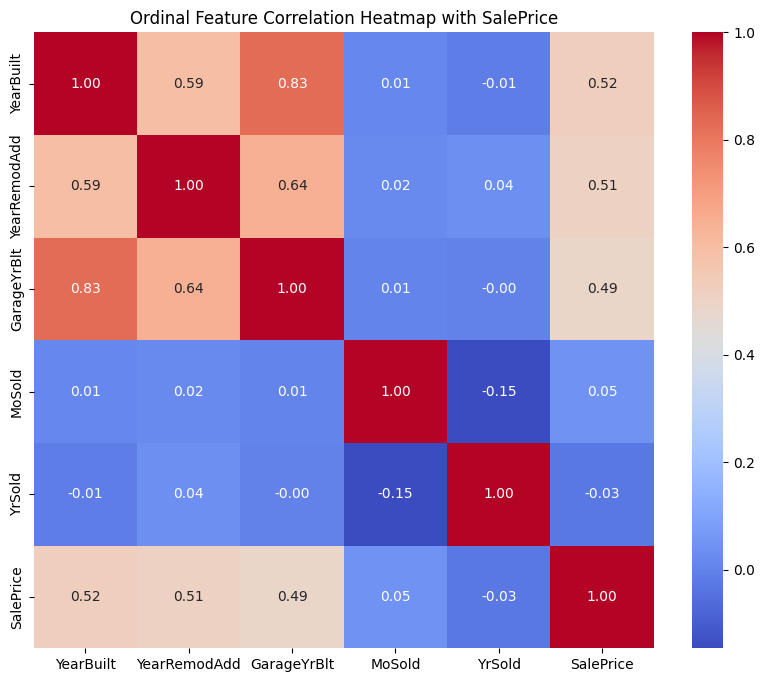

In [103]:
ordinal_feature_corr_matrix = df_train[ordinal_features+['SalePrice']].corr(method='spearman')
plt.figure(figsize=(10,8))
sns.heatmap(datetime_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Ordinal Feature Correlation Heatmap with SalePrice')

<Axes: >

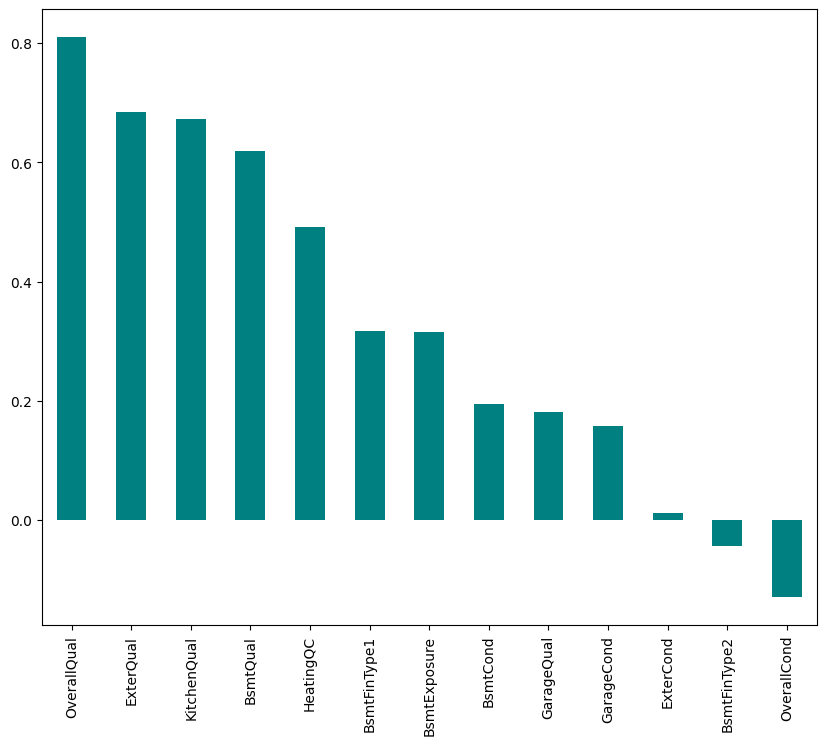

In [104]:
ordinal_saleprice_corr = ordinal_feature_corr_matrix['SalePrice'].sort_values(ascending=False)
ordinal_saleprice_corr.drop('SalePrice').plot(kind='bar', figsize=(10,8), color='teal')

In [105]:
list(ordinal_feature_corr_matrix['SalePrice'][ordinal_feature_corr_matrix['SalePrice'] < .35].index)

['OverallCond',
 'ExterCond',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'GarageQual',
 'GarageCond']

In [106]:
df_train.drop(columns=list(ordinal_feature_corr_matrix['SalePrice'][ordinal_feature_corr_matrix['SalePrice'] < .35].index), inplace=True)

In [107]:
df_train.shape

(1460, 58)

# __Anova (Analysis of Variance) for Nominal Features__
#### __Pearson correlation__ measures __linear relationships__ between __continuous numeric variables__, ideal for straightforward numeric datasets.
#### __Spearman correlation__ works for __ordinal or monotonic relationships__, ranking data before calculating correlations.
#### Traditional methods __fail with nominal data__ as it lacks order and meaningful numeric distances.
#### __Encoding nominal features__ into numbers may introduce __artificial order, leading to misleading correlations__.
#### __ANOVA (Analysis of Variance)__ divides data into groups, comparing target variable means across nominal feature categories.
#### __Variance comparison__ in ANOVA reveals whether nominal features significantly affect the target variable.
#### __LotShape__ has two values __Regular and Ir-regular__
#### __F-statistic__ evaluates between-group to within-group variance ratio to identify strong feature impacts.
#### __P-value__ determines significance; values under 0.05 show features meaningfully impact the target variable.
#### Use __scipy.stats__ library for calculating __P-Value and F-Statistic__ with __f_oneway function__.

# __Nominal Features analysis__
#### Use __from scipy.stats import f_oneway__ to cacluatore F-Statistics and P-value
#### Identified __32 nominal features__ and created a list for easy reference and updates.
#### Removed 'Alley,' 'MasVnrType,' and 'MiscFeature' from the list during missing value analysis.
#### Used __ANOVA__ to determine significant nominal features influencing SalePrice based on their categories.
#### Calculated ANOVA for CentralAir and identified it as a significant feature with two unique values.
#### Repeated the process for Street and found it insignificant due to low F-Statistic and high P-Value.
#### Reduced features from 79 to 45 by analyzing ANOVA results and setting an F-Statistic threshold.

In [109]:
nominal_feature = list(feature_cat['Feature_type'][feature_cat['Feature_type'] == 'nominal'].index)
nominal_feature

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [110]:
nominal_feature.remove('Alley')
nominal_feature.remove('MasVnrType')
nominal_feature.remove('MiscFeature')
nominal_feature

['MSSubClass',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [111]:
df_train[nominal_feature].head()

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,HalfBath,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,PavedDrive,SaleType,SaleCondition
0,60,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,8,Typ,0,Attchd,RFn,2,Y,WD,Normal
1,20,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,0,6,Typ,1,Attchd,RFn,2,Y,WD,Normal
2,60,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,1,6,Typ,1,Attchd,RFn,2,Y,WD,Normal
3,70,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,0,7,Typ,1,Detchd,Unf,3,Y,WD,Abnorml
4,60,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,1,9,Typ,1,Attchd,RFn,3,Y,WD,Normal


In [112]:
for feature in nominal_feature:
    feature_name, feature_description, feature_details = extract_feature_info(feature, data_info)
    print('-'*50)
    print(f'{feature_name} : {feature_description}')
    print(feature_details)

--------------------------------------------------
MSSubClass : Identifies the type of dwelling involved in the sale.
20	1-STORY 1946 & NEWER ALL STYLES
30	1-STORY 1945 & OLDER
40	1-STORY W/FINISHED ATTIC ALL AGES
45	1-1/2 STORY - UNFINISHED ALL AGES
50	1-1/2 STORY FINISHED ALL AGES
60	2-STORY 1946 & NEWER
70	2-STORY 1945 & OLDER
75	2-1/2 STORY ALL AGES
80	SPLIT OR MULTI-LEVEL
85	SPLIT FOYER
90	DUPLEX - ALL STYLES AND AGES
120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
150	1-1/2 STORY PUD - ALL AGES
160	2-STORY PUD - 1946 & NEWER
180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
190	2 FAMILY CONVERSION - ALL STYLES AND AGES
--------------------------------------------------
MSZoning : Identifies the general zoning classification of the sale.
A	Agriculture
C	Commercial
FV	Floating Village Residential
I	Industrial
RH	Residential High Density
RL	Residential Low Density
RP	Residential Low Density Park
RM	Residential Medium Density
--------------------------------------------------
Str

In [113]:
# Group SalePrice by unique values of CentralAir
groups = [df_train['SalePrice'][df_train['CentralAir'] == category] for category in df_train['CentralAir'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

# Results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 98.30534356615253
P-Value: 1.8095061559267854e-22


In [114]:
len(groups)

2

In [115]:
# Group SalePrice by unique values of CentralAir
groups = [df_train['SalePrice'][df_train['Street'] == category] for category in df_train['Street'].unique()]

# Perform ANOVA
f_stat, p_value = f_oneway(*groups)

# Results
print(f"F-Statistic: {f_stat}")
print(f"P-Value: {p_value}")

F-Statistic: 2.4592895583691994
P-Value: 0.11704860406782483


In [116]:
# Dictionary to store ANOVA results
anova_results = {}

# Iterate over each nominal feature
for feature in nominal_feature:
    # Print unique values of the feature
    # print(f"Unique values for {feature}: {df_train[feature].unique()}")

    # Group SalePrice by unique categories of the feature
    groups = [df_train['SalePrice'][df_train[feature] == category] for category in df_train[feature].unique()]

    # Perform ANOVA
    f_stat, p_value = f_oneway(*groups)

    # Store ANOVA results
    anova_results[feature] = {'F-Statistic': f_stat, 'P-Value': p_value}

# Convert results to DataFrame for further analysis
anova_df = pd.DataFrame(anova_results).T

# Display the ANOVA results
print(anova_df)

               F-Statistic        P-Value
MSSubClass       33.732076   8.662166e-79
MSZoning         43.840282   8.817634e-35
Street            2.459290   1.170486e-01
LotShape         40.132852   6.447524e-25
LandContour      12.850188   2.742217e-08
Utilities         0.298804   5.847168e-01
LotConfig         7.809954   3.163167e-06
LandSlope         1.958817   1.413964e-01
Neighborhood     71.784865  1.558600e-225
Condition1        6.118017   8.904549e-08
Condition2        2.073899   4.342566e-02
BldgType         13.011077   2.056736e-10
HouseStyle       19.595001   3.376777e-25
RoofStyle        17.805497   3.653523e-17
RoofMatl          6.727305   7.231445e-08
Exterior1st      18.611743   2.586089e-43
Exterior2nd      17.500840   4.842186e-43
Foundation      100.253851   5.791895e-91
Heating           4.259819   7.534721e-04
CentralAir       98.305344   1.809506e-22
Electrical             NaN            NaN
BsmtFullBath     27.448015   2.882436e-17
BsmtHalfBath      0.221461   8.013

<ipython-input-116-8c7689a51c96>:13: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_stat, p_value = f_oneway(*groups)


<Axes: >

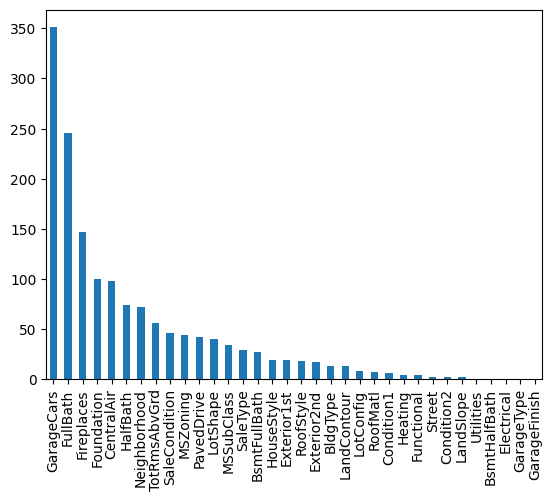

In [117]:
anova_df['F-Statistic'].sort_values(ascending=False).plot(kind='bar')

In [118]:
anova_df.sort_values(['F-Statistic'], ascending=False)

,F-Statistic,P-Value
GarageCars,351.207486,1.121129e-211
FullBath,246.067004,3.802188e-129
Fireplaces,146.741176,4.421001e-83
Foundation,100.253851,5.791895e-91
CentralAir,98.305344,1.809506e-22
HalfBath,74.469701,1.609145e-31
Neighborhood,71.784865,1.558600e-225
TotRmsAbvGrd,56.164238,1.191710e-103
SaleCondition,45.578428,7.988268e-44
MSZoning,43.840282,8.817634e-35


In [119]:
df_train.drop(columns=list(anova_df[anova_df['F-Statistic']<70].index), inplace=True)

In [120]:
df_train.shape

(1460, 34)

In [121]:
df_train.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Neighborhood', 'OverallQual',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation',
       'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [122]:
# Save the DataFrame as train_refined.csv
df_train.to_csv('train_refined.csv', index=False)

# __Data Analysis Final words__
#### __EDA__ uncovers patterns, relationships, and anomalies, forming the foundation for predictive modeling processes.
#### It transforms raw data into actionable insights using statistical measures, visualizations, and feature analysis.
#### The project reduced 79 features to 45, focusing on impactful predictors for SalePrice.
#### Techniques like __Pearson, Spearman, and ANOVA__ revealed significant relationships while managing missing data effectively.
#### Completing this EDA process demonstrates expertise in refining datasets for diverse data-driven challenges.